# 算平均每轮成功车数

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from utils.options import args_parser
from utils.sumo_utils import read_tripInfo, sumo_run
from utils.interface_for_FL import generate_FLtable_from_tripInfo
from utils.options import args_parser

args = args_parser(['--sumo_data_dir','./sumo_data','--no_sumo_run', '--round_duration', '30'])
args.round_duration = 6

In [ ]:
args.MU_local_train = args.local_iter * args.mu_local_train
args.BETA_local_train = args.local_iter * args.beta_local_train

if args.no_sumo_run == False:
    os.makedirs(args.sumo_data_dir, exist_ok=True)
    sumo_run(args, save_dir=args.sumo_data_dir)
car_tripinfo = read_tripInfo(tripInfo_path=os.path.join(args.sumo_data_dir,'tripinfo.xml'))
FL_table = generate_FLtable_from_tripInfo(args)

car_num_list = [len(v) for k,v in FL_table.items()]
L = len(car_num_list)
car_num_list = car_num_list[int(0.1*L):int(0.9*L)]
MEAN, VAR = np.mean(car_num_list), np.var(car_num_list)
print("MEAN", MEAN, "VAR", VAR)

car_num_dict = {}
_cnt = 0
_i = 0
while _cnt<len(car_num_list):
    car_num_dict[_i] = 0
    for car_num in car_num_list:
        if car_num==_i:
            car_num_dict[_i] += 1
            _cnt += 1
    car_num_dict[_i] /= len(car_num_list)
    _i += 1

In [23]:
Lambda = args.Lambda
T_round = args.round_duration
H = args.local_iter
a = args.mu_local_train
u = 1/args.beta_local_train
Rc = 420
v = args.maxSpeed
T_stay = Rc/v
D = args.delay_download + args.delay_upload

tau = np.min([T_round,T_stay])
p1 = 1/(tau)*(tau-a*H-D-H/u*(1-np.exp(-u/H*(tau-a*H-D))))
p2 = 1-np.exp(-u/H*(tau-a*H-D))

E = 2*Lambda*tau*p1 + Lambda*np.abs(T_round-T_stay)*p2
print('analyzation result:', E)

MEAN 1.16275 VAR 1.0912624375
analyzation result: 1.0953326147114135


# 画泊松分布

Text(0.5, 0, 'success car num')

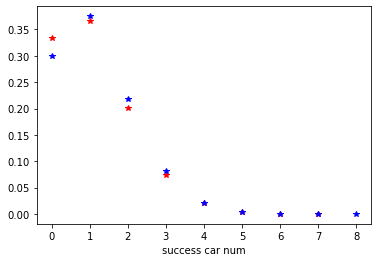

In [24]:
threshold = 0.99995
assert threshold>=0 and threshold<1
y = []
i = 0
while sum(y)<threshold:
    y.append(E**i/np.math.factorial(i)*np.exp(-E))
    i += 1
plt.plot(y, linestyle='', marker='*', color='r')
plt.plot(car_num_dict.values(), linestyle='', marker='*', color='b')
plt.xlabel('success car num')

# 轮次时长与每轮成功车数的关系

Text(0, 0.5, 'average of car num per round')

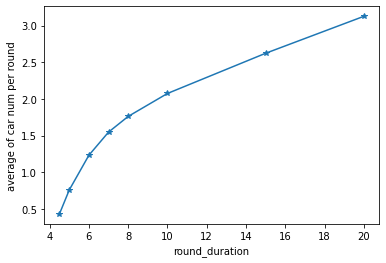

In [5]:
x = [4.5, 5,6,7,8,10,15,20]
y = [0.42921432589536845, 0.7565625, 1.23075, 1.5462368728121354, 1.7605, 2.07375, 2.6221875, 3.12625]
plt.figure()
plt.plot(x,y, linestyle = '-', marker = '*')
plt.xlabel('round_duration')
plt.ylabel('average of car num per round')